In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [2]:
pwd = os.getcwd()

In [3]:
dataset = pd.read_csv(pwd + '\\CarPrice_Assignment.csv')

In [4]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
dataset_modified = dataset.copy()

In [5]:
dataset_dummies = dataset.copy()

Symboling = Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Curb Weight = the weight of the vehicle including a full tank of fuel and all standard equipment


<AxesSubplot:title={'center':'Correlation Matrix'}>

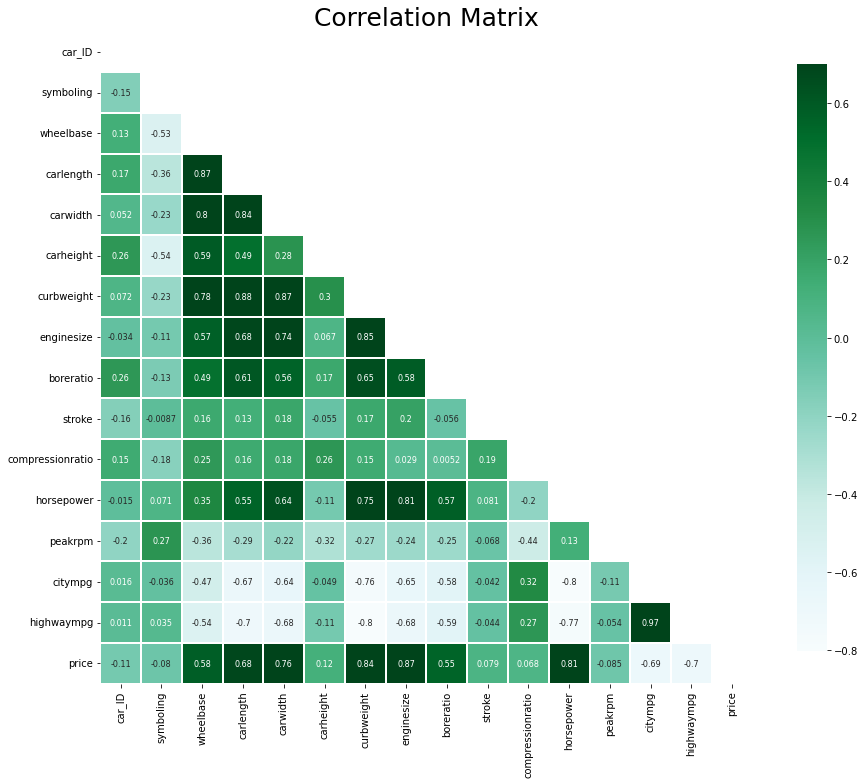

In [6]:
features = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

# np.zeros_like return an array of zeros with the same shape as given array
mask = np.zeros_like(dataset[features].corr(), dtype=np.bool)
# https://www.youtube.com/watch?v=cIHIM3CoVgw (makes it so the matrix is in triangular form)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=25)

sns.heatmap(dataset[features].corr(), linewidths=0.25, vmax=0.7, square=True, cmap='BuGn', linecolor='w', annot=True, annot_kws={'size':8}, mask=mask, cbar_kws={'shrink': .9})

# Simple Linear Regression

In [61]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=3)
lr = linear_model.LinearRegression()
X_train = np.array(train_data['enginesize'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['enginesize'], dtype=pd.Series).reshape(-1, 1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.3f'))
rtrsm = float(format(lr.score(X_train, y_train), '.3f'))
rtesm = float(format(lr.score(X_test, y_test), '.3f'))
cv = float(format(cross_val_score(lr, dataset[['enginesize']], dataset['price'], cv=5).mean(), '.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 14248.366
Intercept: -8393.200102741435
Coefficient: [171.07382717]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557


Not the worst results

In [8]:
sns.set(style='white', font_scale=1)

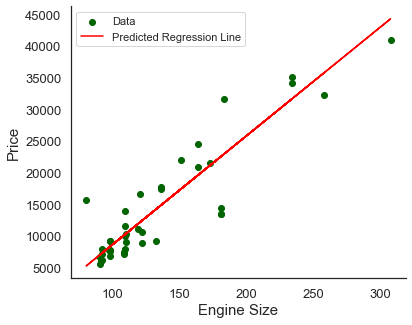

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, color='darkgreen', label='Data', alpha=1)
plt.plot(X_test, lr.predict(X_test), color='red', label='Predicted Regression Line')
plt.xlabel('Engine Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Engine size has a linear growth

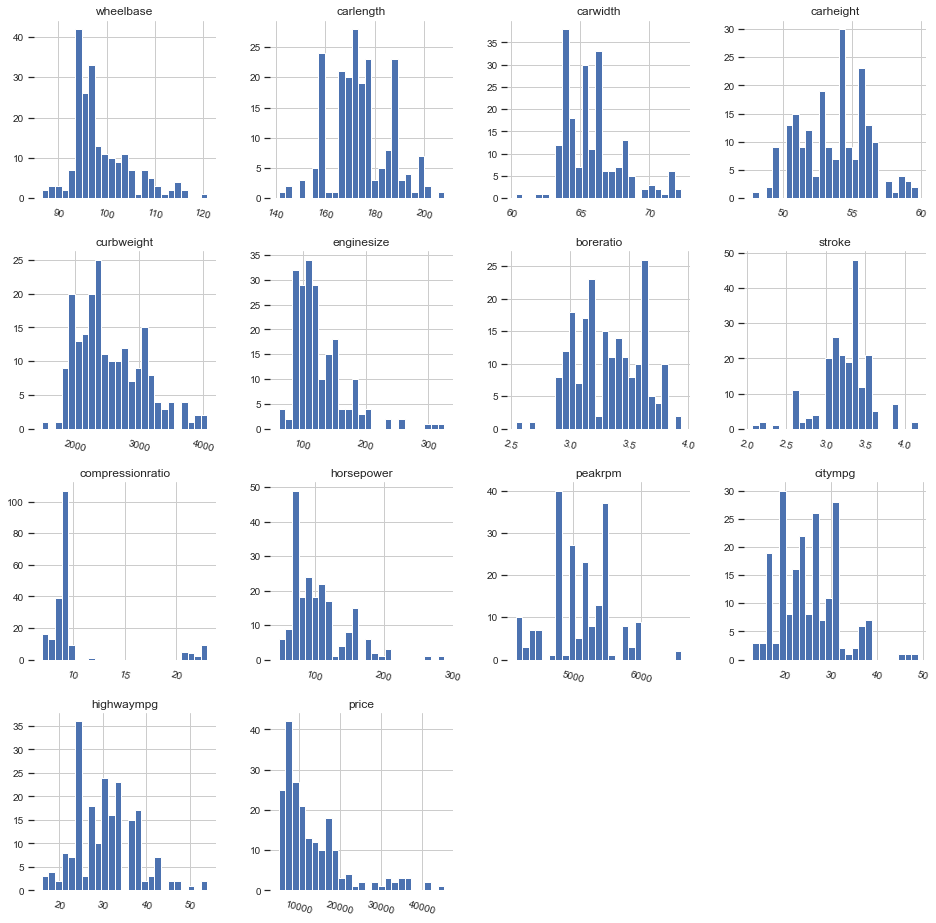

In [47]:
dataset_1 = dataset[['fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
h = dataset_1.hist(bins=25, figsize=(16,16), xlabelsize='10', ylabelsize='10', xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

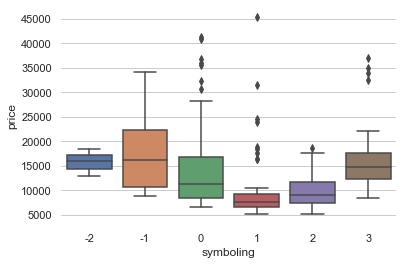

In [49]:
sns.set(style='whitegrid', font_scale=1)
sns.boxplot(x=dataset['symboling'], y=dataset['price'])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Symboling', ylabel='Price')
axes[0].yaxis.tick_left()


[Text(0.5, 0, '\nCar Width'),
 Text(0.5, 0.5, '\nEngine Size'),
 Text(0.5, 0, '\nPrice')]

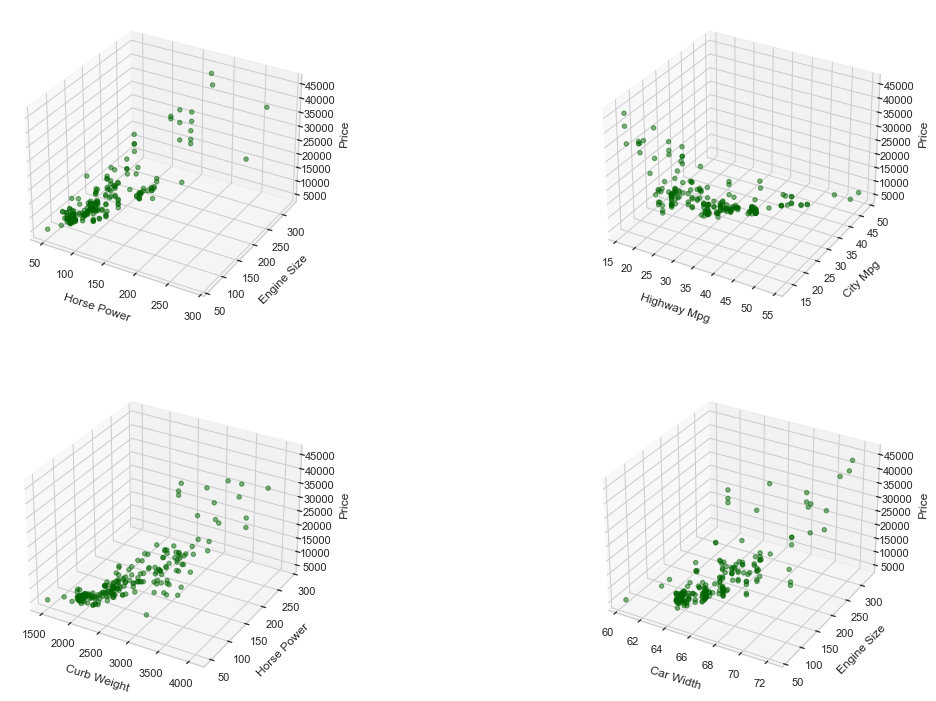

In [57]:
fig=plt.figure(figsize=(19, 12.5))
ax=fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(dataset['horsepower'], dataset['enginesize'], dataset['price'], c='darkgreen', alpha=.5)
ax.set(xlabel='\nHorse Power', ylabel='\nEngine Size', zlabel='\nPrice')

ax=fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(dataset['highwaympg'], dataset['citympg'], dataset['price'], c='darkgreen', alpha=.5)
ax.set(xlabel='\nHighway Mpg', ylabel='\nCity Mpg', zlabel='\nPrice')

ax=fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(dataset['curbweight'], dataset['horsepower'], dataset['price'], c='darkgreen', alpha=.5)
ax.set(xlabel='\nCurb Weight', ylabel='\nHorse Power', zlabel='\nPrice')

ax=fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(dataset['carwidth'], dataset['enginesize'], dataset['price'], c='darkgreen', alpha=.5)
ax.set(xlabel='\nCar Width', ylabel='\nEngine Size', zlabel='\nPrice')


In [ ]:
sns.histplot

# Data Preprocessing

The corrolation between highwaympg and citympg is too high so we will remove one of them so we dont over fit.

In [65]:
dataset_modified['horsepower'].describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

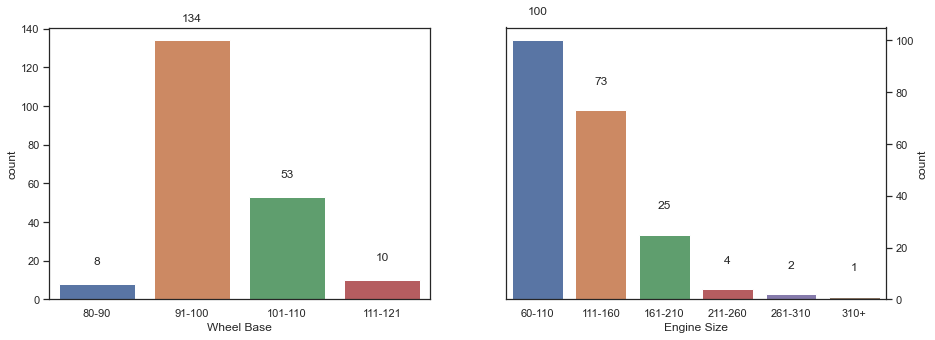

In [10]:
bins=[80,90,100,110,125]
labels = ['80-90', '91-100', '101-110', '111-121']
dataset_modified['wheelbase_binned'] = pd.cut(dataset_modified['wheelbase'], bins=bins, labels=labels)

bins=[60,110,160,210,260,310,400]
labels = ['60-110', '111-160', '161-210', '211-260', '261-310', '310+']
dataset_modified['enginesize_binned'] = pd.cut(dataset_modified['enginesize'], bins=bins, labels=labels)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
p1 = sns.countplot(dataset_modified['wheelbase_binned'], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2, height+10, height, ha='center')
p2 = sns.countplot(dataset_modified['enginesize_binned'], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2, height + 10, height, ha='center')

axes[0].set(xlabel='Wheel Base')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Engine Size')

dataset_modified = pd.get_dummies(dataset_modified, columns=['wheelbase_binned', 'enginesize_binned'])


In [85]:
dataset['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [12]:
def fueltypechange(x):
    if x == 'gas':
        return 0
    else:
        return 1

def doornumberchange(x):
    if x == 'two':
        return 2
    else:
        return 4

def aspirationchange(x):
    if x == 'std':
        return 0
    else:
        return 1

def carbodychange(x):
    if x == 'convertible':
        return 0
    elif x == 'hatchback':
        return 2
    elif x == 'sedan':
        return 3
    elif x == 'wagon':
        return 4
    else:
        return 5

def drivewheelchange(x):
    if x == 'rwd':
        return 0
    elif x == 'fwd':
        return 1
    else:
        return 2

def enginelocationchange(x):
    if x == 'front':
        return 0
    else:
        return 1

'mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'

def fuelsystemchange(x):
    if x == 'mpfi':
        return 0
    elif x == '2bbl':
        return 2
    elif x == 'mfi':
        return 3
    elif x == '1bbl':
        return 4
    elif x == 'spfi':
        return 5
    elif x == '4bbl':
        return 6
    elif x == 'idi':
        return 7
    else:
        return 8

dataset_modified['fueltype'] = dataset_modified['fueltype'].apply(lambda x: fueltypechange(x))
dataset_modified['doornumber'] = dataset_modified['doornumber'].apply(lambda x: doornumberchange(x))
dataset_modified['aspiration'] = dataset_modified['aspiration'].apply(lambda x: aspirationchange(x))
dataset_modified['carbody'] = dataset_modified['carbody'].apply(lambda x: carbodychange(x))
dataset_modified['drivewheel'] = dataset_modified['drivewheel'].apply(lambda x: drivewheelchange(x))
dataset_modified['enginelocation'] = dataset_modified['enginelocation'].apply(lambda x: enginelocationchange(x))
dataset_modified['fuelsystem'] = dataset_modified['fuelsystem'].apply(lambda x: fuelsystemchange(x))

In [14]:
dataset_modified.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+'],
      dtype='object')

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
dataset_modified.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,wheelbase_binned_80-90,wheelbase_binned_91-100,wheelbase_binned_101-110,wheelbase_binned_111-121,enginesize_binned_60-110,enginesize_binned_111-160,enginesize_binned_161-210,enginesize_binned_211-260,enginesize_binned_261-310,enginesize_binned_310+
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,1,four,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,1,four,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,2,0,0,94.5,171.2,65.5,52.4,2823,1,six,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0
3,4,2,audi 100 ls,0,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,1,four,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,1,0,0,0,0,0
4,5,2,audi 100ls,0,0,4,3,2,0,99.4,176.6,66.4,54.3,2824,1,five,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,1,0,0,0,0


In [25]:

def enginetypechange(x):
    if x == 'dohc':
        return 0
    elif x == 'ohcv':
        return 2
    elif x == 'ohc':
        return 3
    elif x == 'l':
        return 4
    elif x == 'rotor':
        return 5
    elif x == 'ohcf':
        return 6
    else:
        return 7

dataset_modified['enginetype'] = dataset_modified['enginetype'].apply(lambda x: fueltypechange(x))

In [40]:
dataset_modified['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:

def cylindernumberchange(x):
    if x == 'eight':
        return 8
    elif x == 'two':
        return 2
    elif x == 'three':
        return 3
    elif x == 'four':
        return 4
    elif x == 'five':
        return 5
    elif x == 'six':
        return 6
    else:
        return 12

dataset_modified['cylindernumber'] = dataset_modified['cylindernumber'].apply(lambda x: fueltypechange(x))

In [26]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

<AxesSubplot:title={'center':'Correlation Matrix'}>

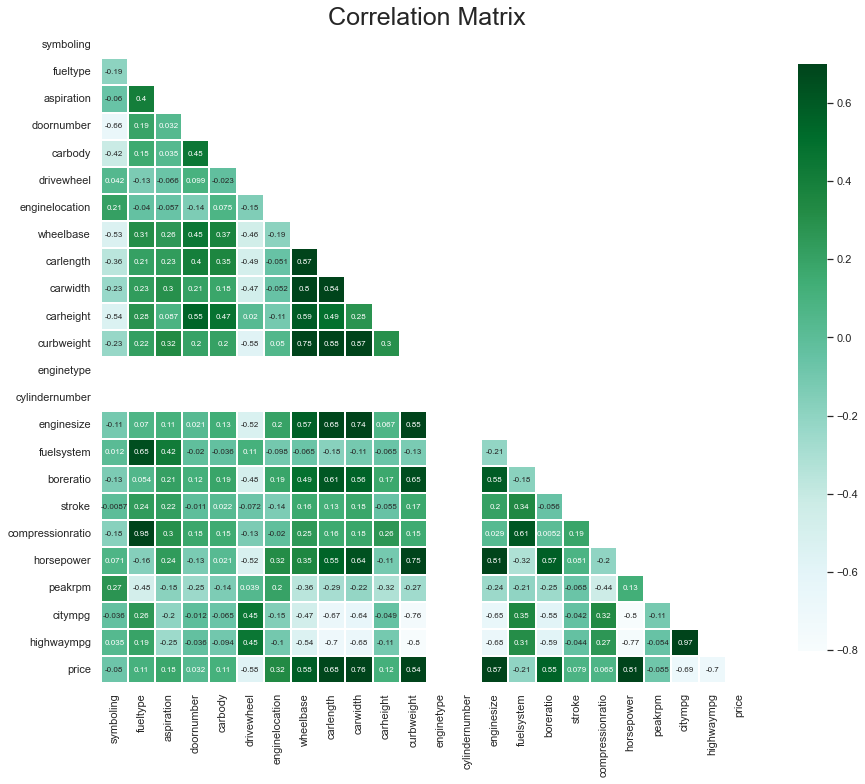

In [42]:
features = ['symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

mask = np.zeros_like(dataset_modified[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=25)

sns.heatmap(dataset_modified[features].corr(), linewidths=0.25, vmax=0.7, square=True, cmap='BuGn', linecolor='w', annot=True, annot_kws={'size':8}, mask=mask, cbar_kws={'shrink': .9})

In [ ]:
features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']

In [62]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -34362.01303006498
Coefficients: [373.44659945   4.01810365   2.25482045  85.26208621  54.53614253]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546


In [51]:
dataset_modified.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+'],
      dtype='object')

In [63]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'boreratio' ,'wheelbase_binned_80-90', 'wheelbase_binned_91-100',
                'wheelbase_binned_101-110', 'wheelbase_binned_111-121']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -37509.17344554084
Coefficients: [ 4.79802860e+02  4.26159655e+01  1.15487510e+00  7.74598868e+01
  5.54106784e+01 -1.52278573e+03  3.89583790e+03 -2.70079919e+03
 -8.28298657e+02 -3.66740055e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
2,Multiple Regression-2,selected features,3551.137,0.839,0.829,0.847,0.803,0.450


In [64]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -53015.125988042906
Coefficients: [-8.51297121e+01  6.55394118e+03  5.81992417e+01 -1.50852787e+02
 -3.95165313e+02  8.28738445e+03 -4.30988116e+02  7.27763448e+01
  5.20768683e+02  1.83940259e+02  1.80307873e+00  7.63138376e+01
 -7.73573652e+01 -1.03712849e+03 -1.68971906e+03 -2.68883896e+02
  3.13042327e+01  1.81870454e+00 -5.29312040e+01  3.07949356e+03
 -7.36808326e+02  6.06269581e+02 -2.94895481e+03 -2.13793142e+03
 -4.33685100e+03 -2.36032026e+03  5.43343624e+03  1.01958210e+04
 -6.79415457e+03]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
3,Multiple Regression-3,all features,3514.611,0.906,0.886,0.850,0.502,0.479
2,Multiple Regression-2,selected features,3551.137,0.839,0.829,0.847,0.803,0.450


In [65]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'symboling', 'carheight', 'boreratio', 'stroke',
                'compressionratio', 'peakrpm', 'citympg', 'wheelbase_binned_80-90', 'wheelbase_binned_91-100','drivewheel',
                'wheelbase_binned_101-110', 'wheelbase_binned_111-121', 'enginesize_binned_60-110', 'enginesize_binned_111-160',
                'enginesize_binned_161-210', 'enginesize_binned_211-260', 'enginesize_binned_261-310', 'enginesize_binned_310+']
complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_4.intercept_))
print('Coefficients: {}'.format(complex_model_4.coef_))

pred = complex_model_4.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_4,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -48272.03265037767
Coefficients: [ 3.91939526e+02  4.63879148e+01  5.84957141e-01  9.61573001e+01
  4.26983700e+01 -3.70019906e+00  2.19739161e+02 -8.79170189e+02
 -2.05988248e+03  2.84867579e+02  1.99948305e+00 -1.38564380e+02
  4.40590201e+03 -1.53537564e+03 -1.55169424e+02 -6.74347804e+01
 -2.80309158e+03 -5.17930540e+02 -2.59390312e+03 -9.67255645e+02
  5.83753703e+03  8.48846134e+03 -1.02469091e+04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
3,Multiple Regression-3,all features,3514.611,0.906,0.886,0.850,0.502,0.479
4,Multiple Regression-4,selected features,3733.973,0.897,0.881,0.831,0.625,0.458
2,Multiple Regression-2,selected features,3551.137,0.839,0.829,0.847,0.803,0.450


## Ridge Regression

In [66]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
7,Ridge Regression,"alpha=1000, all features",3733.973,0.834,0.8,0.827,0.424,0.557
6,Ridge Regression,"alpha=100, all features",3733.973,0.855,0.825,0.824,0.415,0.548
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
5,Ridge Regression,"alpha=1, all features",3733.973,0.898,0.877,0.856,0.521,0.521
3,Multiple Regression-3,all features,3514.611,0.906,0.886,0.850,0.502,0.479
4,Multiple Regression-4,selected features,3733.973,0.897,0.881,0.831,0.625,0.458
2,Multiple Regression-2,selected features,3551.137,0.839,0.829,0.847,0.803,0.450


## Lasso Regression

In [67]:
train_data_dm,test_data_dm = train_test_split(dataset_modified,train_size = 0.8,random_state=3)

features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features], train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features], train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features], train_data_dm['price'])

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
10,Lasso Regression,"alpha=1000, all features",3733.973,0.829,0.793,0.828,0.428,0.569
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
7,Ridge Regression,"alpha=1000, all features",3733.973,0.834,0.8,0.827,0.424,0.557
6,Ridge Regression,"alpha=100, all features",3733.973,0.855,0.825,0.824,0.415,0.548
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
9,Lasso Regression,"alpha=100, all features",3733.973,0.874,0.848,0.823,0.411,0.528
5,Ridge Regression,"alpha=1, all features",3733.973,0.898,0.877,0.856,0.521,0.521
8,Lasso Regression,"alpha=1, all features",3733.973,0.906,0.886,0.852,0.506,0.502
3,Multiple Regression-3,all features,3514.611,0.906,0.886,0.850,0.502,0.479
4,Multiple Regression-4,selected features,3733.973,0.897,0.881,0.831,0.625,0.458


In [81]:
train_data, test_data = train_test_split(dataset_modified, train_size=0.8, random_state=3)

evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))


features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['price'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['price'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['price'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['price'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",4430.927,0.894,0.762,2.840000e-01
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",3732.373,0.929,0.831,-1.240000e-01
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",3697.458,0.989,0.835,-3.870000e-01
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",3764.776,0.966,0.828,-1.365000e+00
1,Polynomial Regression,"degree=3, selected features, no preprocessing",17545.873,0.959,-2.726,-2.163300e+01
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",27065.284,0.998,-7.867,-4.761500e+01
3,Polynomial Regression,"degree=3, all features, no preprocessing",356974.383,0.999,-1541.435,-1.915192e+03
2,Polynomial Regression,"degree=2, all features, no preprocessing",142315.886,0.999,-244.154,-4.797460e+07
4,Polynomial Regression,"degree=2, all features",151593.006,0.999,-277.158,-4.644042e+09


In [82]:
train_data, test_data = train_test_split(dataset_modified, train_size=0.8, random_state=3)

evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'symboling', 'carheight', 'boreratio', 'stroke',
               'compressionratio', 'peakrpm', 'citympg']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))


features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'symboling', 'carheight', 'boreratio', 'stroke',
               'compressionratio', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['price'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['price'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['price'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset_modified[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['price'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",4430.927,0.894,0.762,2.840000e-01
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",4014.640,0.921,0.805,-1.300000e-02
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",3522.020,0.957,0.850,-9.700000e-01
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",3949.910,0.976,0.811,-1.133000e+00
2,Polynomial Regression,"degree=2, all features, no preprocessing",12046.461,0.670,-0.757,-5.535000e+00
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",13667.962,0.993,-1.261,-1.954500e+01
1,Polynomial Regression,"degree=3, selected features, no preprocessing",17545.873,0.959,-2.726,-2.163300e+01
3,Polynomial Regression,"degree=3, all features, no preprocessing",169740.028,0.999,-347.740,-5.136412e+04
4,Polynomial Regression,"degree=2, all features",2191825.315,0.998,-58148.320,-8.246819e+08


In [83]:
features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'symboling', 'carheight', 'boreratio', 'stroke',
               'compressionratio', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=15, all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
10,Lasso Regression,"alpha=1000, all features",3733.973,0.829,0.793,0.828,0.428,0.569
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
7,Ridge Regression,"alpha=1000, all features",3733.973,0.834,0.8,0.827,0.424,0.557
6,Ridge Regression,"alpha=100, all features",3733.973,0.855,0.825,0.824,0.415,0.548
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
9,Lasso Regression,"alpha=100, all features",3733.973,0.874,0.848,0.823,0.411,0.528
5,Ridge Regression,"alpha=1, all features",3733.973,0.898,0.877,0.856,0.521,0.521
13,KNN Regression,"k=27, all features",5502.665,0.609,0.552,0.633,0.228,0.511
8,Lasso Regression,"alpha=1, all features",3733.973,0.906,0.886,0.852,0.506,0.502
12,KNN Regression,"k=25, all features",5374.844,0.628,0.573,0.650,0.264,0.494


In [84]:
features = ['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation','drivewheel',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg','wheelbase_binned_80-90', 'wheelbase_binned_91-100',
       'wheelbase_binned_101-110', 'wheelbase_binned_111-121',
       'enginesize_binned_60-110', 'enginesize_binned_111-160',
       'enginesize_binned_161-210', 'enginesize_binned_211-260',
       'enginesize_binned_261-310', 'enginesize_binned_310+']
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,dataset_modified[features],dataset_modified['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression++','k=15, all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression++','k=25, all features',rmseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression++','k=27, all features',rmseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
10,Lasso Regression,"alpha=1000, all features",3733.973,0.829,0.793,0.828,0.428,0.569
0,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,0.557
7,Ridge Regression,"alpha=1000, all features",3733.973,0.834,0.8,0.827,0.424,0.557
6,Ridge Regression,"alpha=100, all features",3733.973,0.855,0.825,0.824,0.415,0.548
1,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,0.546
9,Lasso Regression,"alpha=100, all features",3733.973,0.874,0.848,0.823,0.411,0.528
5,Ridge Regression,"alpha=1, all features",3733.973,0.898,0.877,0.856,0.521,0.521
13,KNN Regression,"k=27, all features",5502.665,0.609,0.552,0.633,0.228,0.511
16,KNN Regression++,"k=27, all features",5502.665,0.609,0.528,0.633,-0.222,0.511
8,Lasso Regression,"alpha=1, all features",3733.973,0.906,0.886,0.852,0.506,0.502


In [85]:
evaluation_temp=evaluation.append(evaluation_poly)
evaluation_temp1=evaluation_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation_temp2=evaluation_temp1.reset_index()
evaluation_f=evaluation_temp2.iloc[:,1:]
evaluation_f

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1000, all features",3733.973,0.829,0.793,0.828,0.428,5.690000e-01
1,Simple Linear Regression,-,3907.696,0.744,-,0.815,-,5.570000e-01
2,Ridge Regression,"alpha=1000, all features",3733.973,0.834,0.8,0.827,0.424,5.570000e-01
3,Ridge Regression,"alpha=100, all features",3733.973,0.855,0.825,0.824,0.415,5.480000e-01
4,Multiple Regression-1,selected features,3383.807,0.802,0.797,0.861,0.846,5.460000e-01
5,Lasso Regression,"alpha=100, all features",3733.973,0.874,0.848,0.823,0.411,5.280000e-01
6,Ridge Regression,"alpha=1, all features",3733.973,0.898,0.877,0.856,0.521,5.210000e-01
7,KNN Regression++,"k=27, all features",5502.665,0.609,0.528,0.633,-0.222,5.110000e-01
8,KNN Regression,"k=27, all features",5502.665,0.609,0.552,0.633,0.228,5.110000e-01
9,Lasso Regression,"alpha=1, all features",3733.973,0.906,0.886,0.852,0.506,5.020000e-01


With these features the regressions are the best

 features = 'carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'symboling', 'carheight', 'boreratio', 'stroke','compressionratio', 'peakrpm', 'citympg'